## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a=-2
b=1
X=np.linspace(0,20)
Y=a*X + b  

In [3]:
data=X.reshape((-1,1))
label=Y.reshape((-1,1))

In [4]:
data.shape

(50, 1)

In [5]:
label.shape

(50, 1)

#### Plot your data points. 

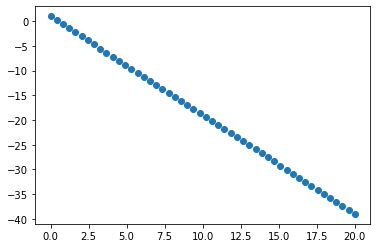

In [4]:
plt.scatter(data,label)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [8]:
def batch_gradient_descent(X, y_true, epochs,learning_parameter):
    theta_0=0
    theta_1=0
    x_0=1
    slopes=[]
    loss=[]
    bias=[]
    itere=[]
    hyp=[]
    for i in range(epochs):
        hypothsis_fn=theta_0+theta_1*X
        hyp.append(hypothsis_fn)
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        loss.append(cost_fn)
        if cost_fn >0.01:
            gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
            gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
            theta_0=theta_0-learning_parameter*gradient_theta_0
            bias.append(theta_0)
            theta_1=theta_1-learning_parameter*gradient_theta_1
            slopes.append(theta_1)
            itere.append(i)
        else:
            break
    return theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn

In [10]:
theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn=batch_gradient_descent(data,label,1000,0.001)

In [11]:
y=theta_0+theta_1*X

In [12]:
Y=y.reshape((-1,1))

In [13]:
Y.shape

(50, 1)

In [14]:
final_score=r2_score(label,Y)
final_score

0.9985487529969077

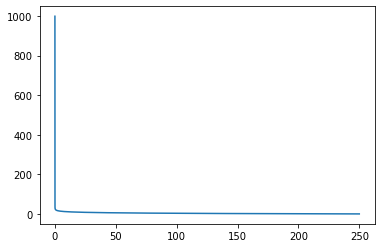

In [15]:
plt.plot(loss,itere)

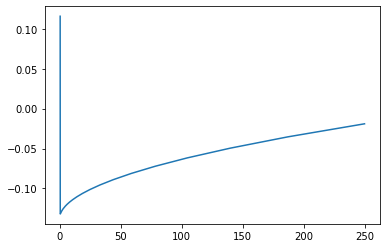

In [16]:
plt.plot(loss,bias)

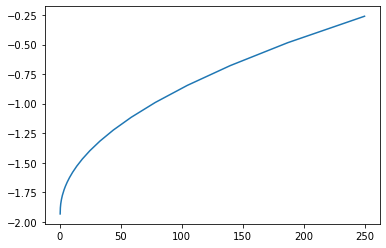

In [17]:
plt.plot(loss,slopes)

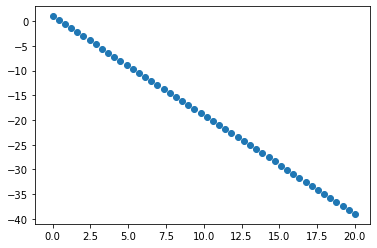

In [22]:
plt.scatter(data,label) 
for i in range(1000):
    plt.plot(bias[i],slopes[i], '-',color='red')    

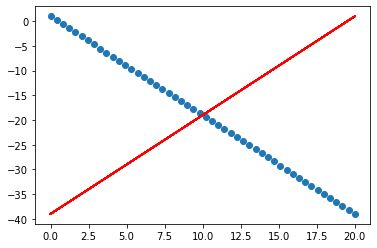

In [29]:
plt.scatter(data,label) 
for i in (data):
    plt.plot([min(data), max(data)], [min(label), max(label)], color='red')
plt.show()

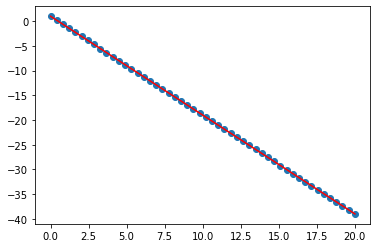

In [30]:
plt.scatter(data,label)
plt.plot(data,label, '-',color='red')

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

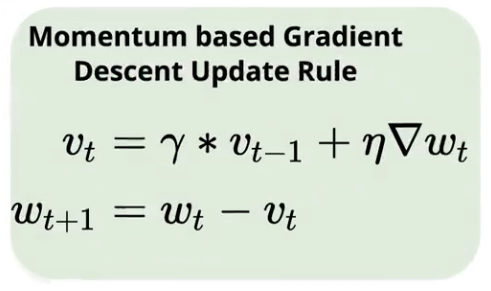

#### γ takes values between 0 and 1.
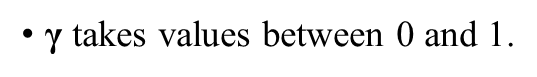

In [4]:
def momentum_gradient_descent(X, y_true, epochs,learning_parameter,gamma):
    theta_0=0
    theta_1=0
    new_change_of_theta_0=0
    new_change_of_theta_1=0
    slopes=[]
    loss=[]
    bias=[]
    itere=[]
    hyp=[]
    for i in range(epochs):
        hypothsis_fn=theta_0+theta_1*X
        #hyp.append(hypothsis_fn)
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        loss.append(cost_fn)
        #for x,y in zip(X,y_true):
        gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
        gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
        new_change_of_theta_0=(gamma *new_change_of_theta_0)+(learning_parameter*gradient_theta_0)
        new_change_of_theta_1=(gamma *new_change_of_theta_1)+(learning_parameter*gradient_theta_1)
        theta_1 = theta_1 - new_change_of_theta_1
        theta_0 = theta_0 - new_change_of_theta_0
        bias.append(theta_0)
        slopes.append(theta_1)
        itere.append(i)
    return theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn

In [20]:
theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn=momentum_gradient_descent(data,label,100,0.001,0.9)

In [27]:
#loss

In [28]:
theta_0,theta_1

(0.10034987827913089, -1.9231441990217208)

In [29]:
y_pr=hypothsis_fn2=theta_0+theta_1*data
r2_score(label,y_pr)

0.9983994623538781

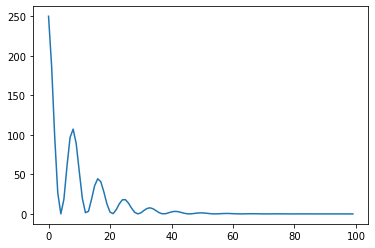

In [30]:
plt.plot(itere,loss)

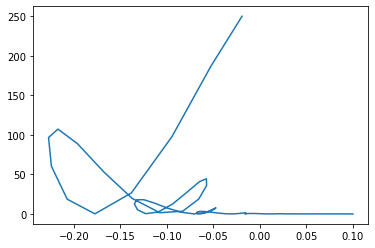

In [31]:
plt.plot(bias,loss)

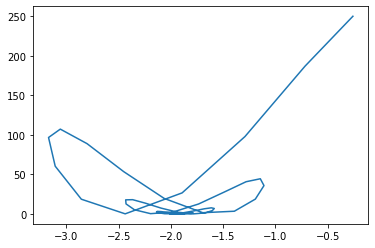

In [32]:
plt.plot(slopes,loss)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [34]:
def momentum_gradient_descent(X, y_true, epochs,learning_parameter,gamma):
    theta_0=0
    theta_1=0
    new_change_of_theta_0=0
    new_change_of_theta_1=0
    slopes=[]
    loss=[]
    bias=[]
    itere=[]
    hyp=[]
    for i in range(epochs):
        hypothsis_fn=theta_0+theta_1*X
        #hyp.append(hypothsis_fn)
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        loss.append(cost_fn)
        #for x,y in zip(X,y_true):
        gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
        gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
        new_change_of_theta_0=(gamma *new_change_of_theta_0)+(learning_parameter*gradient_theta_0)
        new_change_of_theta_1=(gamma *new_change_of_theta_1)+(learning_parameter*gradient_theta_1)
        theta_1 = theta_1 - new_change_of_theta_1
        theta_0 = theta_0 - new_change_of_theta_0
        bias.append(theta_0)
        slopes.append(theta_1)
        itere.append(i)
    return theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn

In [35]:
theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn=momentum_gradient_descent(data,label,10,0.01,0)

In [36]:
theta_0,theta_1

(-0.11351222049051402, -1.9171124832460733)

In [38]:
y=theta_0+theta_1*data
r2_score(label,y)

0.9976986068998674

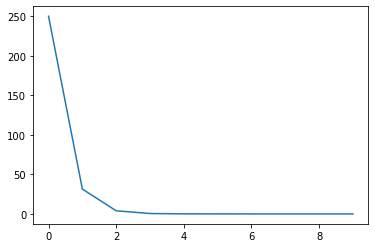

In [39]:
plt.plot(itere,loss)

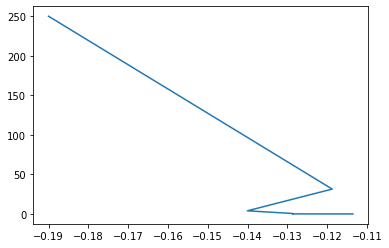

In [40]:
plt.plot(bias,loss)

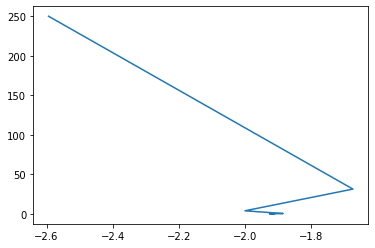

In [41]:
plt.plot(slopes,loss)

### Update your Batch GD for one variable  implementation to be NAG and check your results

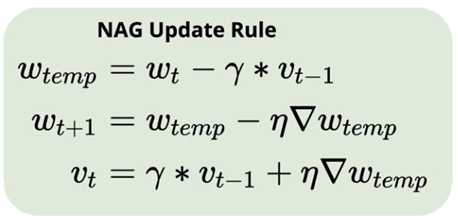

In [11]:
def NAG_gradient_descent(X, y_true, epochs,learning_parameter,gamma):
    theta_0=0
    theta_1=0
    new_change_of_theta_0=0
    new_change_of_theta_1=0
    slopes=[]
    loss=[]
    bias=[] 
    itere=[]
    hyp=[]
    for i in range(epochs):
        hypothsis_fn=theta_0+theta_1*X
        #hyp.append(hypothsis_fn)
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        loss.append(cost_fn)
        #for x,y in zip(X,y_true):
        gradient_theta_0_temp=1/(len(X))*np.sum(hypothsis_fn - y_true)
        theta_0_temp = theta_0 -(gamma*new_change_of_theta_0)
        theta_0=theta_0_temp-(learning_parameter*gradient_theta_0_temp)
        new_change_of_theta_0=(gamma *new_change_of_theta_0)+(learning_parameter*gradient_theta_0_temp)
        bias.append(theta_0)
        
        gradient_theta_1_temp=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
        theta_1_temp =theta_1 -(gamma*new_change_of_theta_1)
        theta_1=theta_1_temp-(learning_parameter*gradient_theta_1_temp)
        new_change_of_theta_1=(gamma *new_change_of_theta_1)+(learning_parameter*gradient_theta_1_temp)
        slopes.append(theta_1)
        itere.append(i)
        
    return theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn

In [24]:
theta_0,theta_1,itere,loss,bias,slopes,hypothsis_fn=NAG_gradient_descent(data,label,1000,0.0001,0.9)

In [25]:
theta_0,theta_1,

(0.11422770871125297, -1.9341128133663519)

In [26]:
yy=theta_0+theta_1*data
r2_score(label,yy)

0.9985437334330033

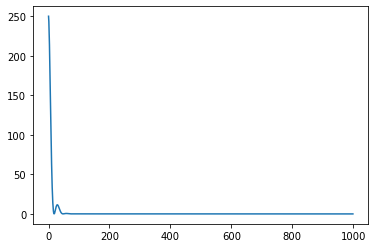

In [27]:
plt.plot(itere,loss)

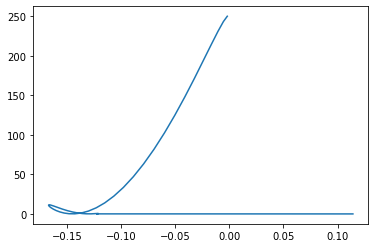

In [28]:
plt.plot(bias,loss)

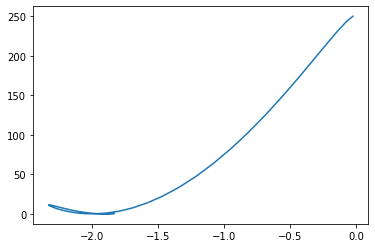

In [29]:
plt.plot(slopes,loss)

## Congratulations 
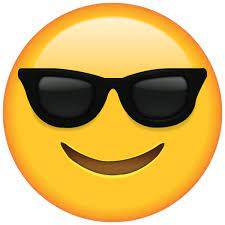